In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(20,10)})

Se nos pide predecir la variable MTO_PIA. Pero, ¿que es esta variable?. Viendo dentro de la metadata (data sobre la data) observamos que esta variable

In [3]:
meta_data_df=pd.read_csv("data/metaData.csv")

In [4]:
pd.set_option('display.max_colwidth', None)
meta_data_df.loc[meta_data_df["Variable"] == "MTO_PIA"]

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
35,MTO_PIA,Monto asignado de Presupuesto Institucional de Apertura.,Numérico,10,NaN,EJEMPLO: 12345.67


Se nos pide predecir el presupuesto Institucional de Apertura dada las demas variables. ¿Que variables influencian sobre el presupuesto inicial?.

In [5]:
meta_data_df[35:74]

,Variable,Descripción,Tipo de dato,Tamaño,Recurso relacionado,Información Adicional
35,MTO_PIA,Monto asignado de Presupuesto Institucional de Apertura.,Numérico,10,NaN,EJEMPLO: 12345.67
36,MTO_MODIFICACIONES,"Monto de cambios en los créditos presupuestarios, tanto en su cuantía como en el nivel Institucional (créditos suplementarios y transferencias de partidas) y, en su caso, a nivel funcional programático (habilitaciones y anulaciones).",Numérico,10,NaN,EJEMPLO: 12345.67
37,MTO_PIM,Monto de Presupuesto Institucional Modificado.,Numérico,10,NaN,EJEMPLO: 12345.67
38,MTO_CERTIFICADO,Monto del presupuesto certificado,Numérico,10,NaN,EJEMPLO: 12345.67 - valor acumulado del certificacion que se realiza de manera permanente
39,MTO_COMPRO_ANUAL,"Monto del presupuesto utilizado en fase Compromiso anual, al nivel mostrado.",Numérico,10,NaN,EJEMPLO: 12345.67
40,MTO_AT_COMP_01,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de enero",Numérico,10,NaN,EJEMPLO: 12345.67
41,MTO_AT_COMP_02,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de febrero",Numérico,10,NaN,EJEMPLO: 12345.67
42,MTO_AT_COMP_03,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de marzo",Numérico,10,NaN,EJEMPLO: 12345.67
43,MTO_AT_COMP_04,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de abril",Numérico,10,NaN,EJEMPLO: 12345.67
44,MTO_AT_COMP_05,"Monto del presupuesto utilizado en fase Compromiso mensual, al mes de mayo",Numérico,10,NaN,EJEMPLO: 12345.67


In [6]:
train_data_df=pd.read_csv("data/train.csv")

In [7]:
train_data_df=pd.read_csv("data/train.csv")
print(train_data_df["SECTOR"].unique())

['40. DESARROLLO E INCLUSION SOCIAL']


In [8]:

print(train_data_df["PLIEGO"].unique())

['040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL']


In [9]:

print(train_data_df["UNIDAD_EJECUTORA"].unique())

['008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION  PARA LA INCLUSION SOCIAL - PAIS']


In [10]:
print(train_data_df["SEC_EJEC"].unique())

[1674]


¿Que valores pueden tomar los datos?

In [11]:
print(train_data_df["PROGRAMA_PPTAL"].unique())

['9001.ACCIONES CENTRALES'
 '9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESULTAN EN PRODUCTOS'
 '0068.REDUCCION DE VULNERABILIDAD Y ATENCION DE EMERGENCIAS POR DESASTRES']


In [12]:
print(train_data_df["TIPO_PROD_PROY"].unique())

['3.PRODUCTO' '2.PROYECTO']


In [13]:
print(train_data_df["PRODUCTO_PROYECTO"].unique())

['3999999.SIN PRODUCTO'
 '3000739.POBLACION CON PRACTICAS SEGURAS PARA LA RESILIENCIA'
 '2176877.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. CCANCCOLLY CRUCERO-CARABAYA-PUNO'
 '2157530.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. CENTRAL CCALLA SAN JUAN DE SALINAS-AZANGARO-PUNO'
 '2176885.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. MARNO - LAMPA - LAMPA - PUNO'
 '2624607.CREACION DEL SERVICIO DEL ESTADO EN POBLACIONES RURALES CON LA PLATAFORMA DE SERVICIOS - TAMBO EN EL CENTRO POBLADO UROS TITINO DEL DISTRITO DE HUATA - PROVINCIA DE PUNO - DEPARTAMENTO DE PUNO'
 '2176887.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL SECTOR AMSTA HUATASANI, TILALI, MOHO, PUNO'
 '2001621.ESTUDIOS DE PRE-INVERSION']


In [14]:
print(train_data_df["TIPO_ACT_OBRA_ACCINV"].unique())

['5.ACTIVIDAD' '6.ACCION DE INVERSION']


In [15]:
print(train_data_df["ACT_OBRA_ACCINV"].unique())

['5000003.GESTION ADMINISTRATIVA'
 '5002358.GESTION DE LAS PRESTACIONES SOCIALES'
 '5001253.TRANSFERENCIA DE RECURSOS PARA LA EJECUCION DE PROYECTOS DE INVERSION'
 '5000005.GESTION DE RECURSOS HUMANOS'
 '5000002.CONDUCCION Y ORIENTACION SUPERIOR'
 '5000004.ASESORAMIENTO TECNICO Y JURIDICO'
 '5000001.PLANEAMIENTO Y PRESUPUESTO'
 '5005582.IMPLEMENTACION DE MEDIDAS DE PROTECCION ANTE BAJAS TEMPERATURAS'
 '6000001.EXPEDIENTE TECNICO' '6000032.ESTUDIOS DE PRE - INVERSION']


In [16]:
print(train_data_df["DIVISION_FN"].unique())

['006.GESTION' '051.ASISTENCIA SOCIAL' '004.PLANEAMIENTO GUBERNAMENTAL'
 '016.GESTION DE RIESGOS Y EMERGENCIAS']


In [17]:
print(train_data_df["META"].unique())

[ 6 20  4  1  7 19 11 10  5 17  8 16 23 15 22 25  3 18 12 13 14 27 21 26
  9 24  2]


In [18]:
print(train_data_df["FINALIDAD"].unique())

['0000888.GESTION ADMINISTRATIVA'
 '0235454.MANTENIMIENTO Y OPERATIVIDAD DE LAS PLATAFORMAS DE SERVICIOS FIJOS (TAMBOS)'
 '0417290.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL CENTRO POBLADO CHEJACHE, DISTRITO DE SAMAN - AZANGARO - PUNO'
 '0367091.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CP EL ARABE, DISTRITO DE JOSE CRESPO Y CASTILLO, LEONCIO PRADO, HUANUCO'
 '0072183.ACCIONES DE PRENSA, IMAGEN Y PROTOCOLO'
 '0235455.MONITOREAR Y SUPERVISAR LA IMPLEMENTACION DE LAS PLATAFORMAS DE SERVICIOS'
 '0235453.ARTICULAR LA PRESTACION DE SERVICIOS Y ACTIVIDADES A TRAVES DE LAS PLATAFORMAS DE SERVICIOS'
 '0367089.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO DE PUERTO AUXILIO, DISTRITO DE LAGUNAS, ALTO AMAZONAS, LORETO'
 '0053571.GESTION DE RECURSOS HUMANOS'
 '0222334.COORDINACION PARA LA OPERACION Y MANTENIMIENTO DE LAS PLATAFORMAS ITINERANTES DE ACCION SOCIAL - PIAS, EN EL MARCO DE LA ESTRATEGIA DE ACCION SOCIAL CON SOSTENIBILIDAD - EASS'
 '0000017.ACCI

In [19]:
print(train_data_df["UNIDAD_MEDIDA"].unique())

['00248.REPORTE' '00043.ESTABLECIMIENTO' '00060.INFORME' '00096.PROYECTO'
 '00152.USUARIO' '00086.PERSONA' '00054.EXPEDIENTE TECNICO' '00001.ACCION'
 '00213.ESTUDIO DE PREINVERSION']


In [20]:
print(train_data_df["CANT_META_ANUAL"].unique())

[0]


In [21]:
print(train_data_df["CANT_META_SEM"].unique())

[    6    16     2    63    17    36    32    61    10    12     4     0
    18    51     1    26    41    20    19    38     9 40890 11500]


In [22]:
print(train_data_df["AVAN_FISICO_ANUAL"].unique())

[0]


In [23]:
print(train_data_df["AVAN_FISICO_SEM"].unique())

[    6    16     2    63    17    36    32    61    10    12     4     0
    19    51     1    26    41    20    40     9 61303 12429]


In [24]:
print(train_data_df["SEC_FUNC"].unique())

[ 9 23 41  4 10 56 48 13 44  8 43 20 45 19 60 52 59 62  6 78 15 42 29 49
 16 53 51 57 25 64 24 63 50 47 46 61 18 55 22 11 12 14 40 21 58 17  7 67
  5 28 54 38  3 27 65 26  2  1 30 70 39 35 66 80 33 31 72 74 71 77 32 79
 36 76 68 69 34 75 37]


In [25]:
print(train_data_df["DEPARTAMENTO"].unique())

['AYACUCHO' 'TACNA' 'AMAZONAS' 'LIMA' 'MADRE DE DIOS' 'CUSCO'
 'HUANCAVELICA' 'AREQUIPA' 'APURIMAC' 'PIURA' 'PASCO' 'PUNO' 'LA LIBERTAD'
 'ANCASH' 'JUNIN' 'HUANUCO' 'LAMBAYEQUE' 'MOQUEGUA' 'UCAYALI' 'CAJAMARCA'
 'SAN MARTIN' 'LORETO']


In [26]:
print(train_data_df["PROVINCIA"].unique())

['HUAMANGA' 'TACNA' 'CHACHAPOYAS' 'LIMA' 'LUCANAS' 'TAMBOPATA' 'CUSCO'
 'HUANCAVELICA' 'AREQUIPA' 'ABANCAY' 'PIURA' 'PASCO' 'PUNO' 'TRUJILLO'
 'HUARAZ' 'AZANGARO' 'HUANCAYO' 'LEONCIO PRADO' 'CHICLAYO'
 'MARISCAL NIETO' 'CORONEL PORTIL' 'HUANUCO' 'CAJAMARCA' 'MOYOBAMBA'
 'MAYNAS' 'ALTO AMAZONAS' 'CAJATAMBO' 'SANCHEZ CARRIO' 'MARANON'
 'CARABAYA' 'LORETO' 'PUTUMAYO' 'REQUENA' 'UCAYALI' 'PUERTO INCA' 'LAMPA'
 'HUAMALIES' 'SATIPO' 'MOHO' 'DATEM DEL MARA' 'OXAPAMPA']


In [27]:
print(train_data_df["DISTRITO"].unique())

['MULTIDISTRITAL' 'LIMA' 'AYACUCHO' 'TRUJILLO' 'SAMAN' 'JOSE CRESPO Y '
 'HUANCAYO' 'HUANUCO' 'PUQUIO' 'LAGUNAS' 'GORGOR' 'MARCABAL' 'CHOLON'
 'CRUCERO' 'ROSA PANDURO' 'JENARO HERRERA' 'PADRE MARQUEZ'
 'CODO DEL POZUZ' 'SARAYACU' 'SAN JUAN DE SA' 'LAMPA' 'MONZON' 'PANGOA'
 'HUATA' 'YAGUAS' 'NAPO' 'TILALI' 'MORONA' 'CONSTITUCION']


In [28]:
print(train_data_df["UBIGEO"].unique())

[ 50199 230199  10199 150101  50699 170199  80199  90199  40199  30199
 200199  50101 190199 210199 130101  20199 210210 120199 100604 130199
 140199 120101 180199 250199 100101  60199  50601 220199 160199 100199
 160206 150303 150199 130905 100702 210306 160399 160802 160510 160603
 100902 160605 210213 210701 100507 120606 210108 160804 160107 210904
 160704 190308]


In [29]:
print(train_data_df["FUENTE_FINANC"].unique())

['1.RECURSOS ORDINARIOS']


In [30]:
print(train_data_df["RUBRO"].unique())

['00.RECURSOS ORDINARIOS']


In [31]:
print(train_data_df["CATEGORIA_GASTO"].unique())

['5.GASTOS CORRIENTES' '6.GASTOS DE CAPITAL']


In [32]:
print(train_data_df["TIPO_TRANSACCION"].unique())

['2.GASTOS PRESUPUESTARIOS']


In [33]:
print(train_data_df["GENERICA"].unique())

['3.BIENES Y SERVICIOS' '5.OTROS GASTOS'
 '6.ADQUISICION DE ACTIVOS NO FINANCIEROS']


In [34]:
print(train_data_df["SUBGENERICA"].unique())

['2.CONTRATACION DE SERVICIOS' '1.COMPRA DE BIENES'
 '2.TRANSFERENCIAS A INSTITUCIONES SIN FINES DE LUCRO'
 '3.ADQUISICION DE VEHICULOS, MAQUINARIAS Y OTROS'
 '4.PAGO DE IMPUESTOS,  DERECHOS ADMINISTRATIVOS Y MULTAS GUBERNAMENTALES'
 '8.OTROS GASTOS DE ACTIVOS NO FINANCIEROS'
 '5.PAGO DE SENTENCIAS JUDICIALES, LAUDOS ARBITRALES Y SIMILARES']


In [35]:
print(train_data_df["SUBGENERICA_DET"].unique())

['6.SERVICIOS ADMINISTRATIVOS, FINANCIEROS Y DE SEGUROS' '1.VIAJES'
 '8.CONTRATO ADMINISTRATIVO DE SERVICIOS'
 '7.SERVICIOS PROFESIONALES Y TECNICOS'
 '3.COMBUSTIBLES, CARBURANTES, LUBRICANTES Y AFINES'
 '5.MATERIALES Y  UTILES'
 '2.SERVICIOS BASICOS, COMUNICACIONES, PUBLICIDAD Y DIFUSION'
 '1.ALIMENTOS Y BEBIDAS'
 '4.SERVICIO DE MANTENIMIENTO, ACONDICIONAMIENTO Y  REPARACIONES'
 '2.TRANSFERENCIAS DE CAPITAL A INSTITUCIONES SIN FINES DE LUCRO.'
 '5.ALQUILERES DE MUEBLES E INMUEBLES' '2.VESTUARIOS Y TEXTILES'
 '99.COMPRA DE OTROS BIENES' '8.SUMINISTROS MEDICOS' '7.ENSERES'
 '9.LOCACIÓN DE SERVICIOS RELACIONADAS AL ROL DE LA ENTIDAD'
 '6.REPUESTOS Y ACCESORIOS'
 '3.SERVICIOS DE LIMPIEZA, SEGURIDAD Y VIGILANCIA'
 '2.ADQUISICION DE MAQUINARIAS, EQUIPO Y MOBILIARIO'
 '1.AL GOBIERNO NACIONAL' '1.OTROS GASTOS DE ACTIVOS NO FINANCIEROS'
 '1.PAGO DE SENTENCIAS JUDICIALES Y LAUDOS ARBITRALES'
 '3.AL GOBIERNO LOCAL' '11.SUMINISTROS PARA MANTENIMIENTO Y REPARACION']


In [36]:
print(train_data_df["ESPECIFICA"].unique())

['3.SEGUROS' '2.VIAJES DOMESTICOS'
 '1.CONTRATO ADMINISTRATIVO DE SERVICIOS' '11.OTROS SERVICIOS'
 '1.COMBUSTIBLES, CARBURANTES, LUBRICANTES Y AFINES'
 '3.ASEO, LIMPIEZA Y COCINA'
 '1.SERVICIOS DE ENERGIA ELECTRICA, AGUA Y GAS' '1.ALIMENTOS Y BEBIDAS'
 '2.DE EDIFICACIONES, OFICINAS Y ESTRUCTURAS' '5.DE VEHICULOS'
 '1.TRANSFERENCIAS CAPITAL' '1.ALQUILERES DE MUEBLES E INMUEBLES'
 '2.SERVICIOS DE TELEFONIA E INTERNET'
 '1.VESTUARIO, ZAPATERIA Y ACCESORIOS, TALABARTERIA Y MATERIALES TEXTILES'
 '1.COMPRA DE OTROS BIENES' '1.PRODUCTOS FARMACEUTICOS' '1.ENSERES'
 '1.LOCACIÓN DE SERVICIOS RELACIONADAS AL ROL DE LA ENTIDAD'
 '7.DE MAQUINARIAS Y EQUIPOS' '1.DE OFICINA'
 '3.SERVICIOS DE MENSAJERIA, TELECOMUNICACIONES Y OTROS AFINES'
 '1.REPUESTOS Y ACCESORIOS' '1.SERVICIOS ADMINISTRATIVOS'
 '5.PRACTICANTES, SECIGRISTAS Y SIMILARES'
 '4.ELECTRICIDAD, ILUMINACION Y ELECTRONICA'
 '2.MATERIAL,INSUMOS,INSTRUMENTAL Y ACCESORIOS MEDICOS,QUIRURGICOS, ODONTOLOGICOS Y DE LABORATORIO'
 '2.SERVICIOS FINANCI

In [37]:
print(train_data_df["ESPECIFICA_DET"].unique())

['99.OTROS SEGUROS DE  BIENES MUEBLES E INMUEBLES'
 '2.VIATICOS Y ASIGNACIONES POR COMISION DE SERVICIO'
 '10.OTROS BONOS EXTRAORDINARIOS' '2.SEGURO DE VEHICULOS'
 '99.SERVICIOS DIVERSOS' '4.AGUINALDOS DE C.A.S.'
 '3.LUBRICANTES, GRASAS Y AFINES' '99.OTROS GASTOS'
 '1.ASEO, LIMPIEZA Y TOCADOR' '1.COMBUSTIBLES Y CARBURANTES'
 '2.SERVICIO DE AGUA Y DESAGUE'
 '1.ALIMENTOS Y BEBIDAS PARA CONSUMO HUMANO'
 '2.TRANSPORTE Y TRASLADO DE CARGA, BIENES Y MATERIALES'
 '4.OTROS SEGUROS PERSONALES'
 '1.SERVICIO DE SUMINISTRO DE ENERGIA ELECTRICA'
 '1.DE EDIFICACIONES, OFICINAS Y ESTRUCTURAS' '1.DE VEHICULOS' '2.GASES'
 '99.A OTRAS ORGANIZACIONES' '1.DE EDIFICIOS Y ESTRUCTURAS'
 '3.SERVICIO DE INTERNET' '1.VESTUARIO, ACCESORIOS Y PRENDAS DIVERSAS'
 '99.OTROS BIENES' '3.SEGURO OBLIGATORIO ACCIDENTES DE TRANSITO (SOAT)'
 '99.OTROS PRODUCTOS SIMILARES' '1.ENSERES'
 '2.CONTRIBUCIONES A ESSALUD DE C.A.S.' '1.SERVICIO DE TELEFONIA MOVIL'
 '5.VACACIONES TRUNCAS DE C.A.S.'
 '1.LOCACIÓN DE SERVICIOS REALIZADO

¿Cual es la distribución de los gastos?

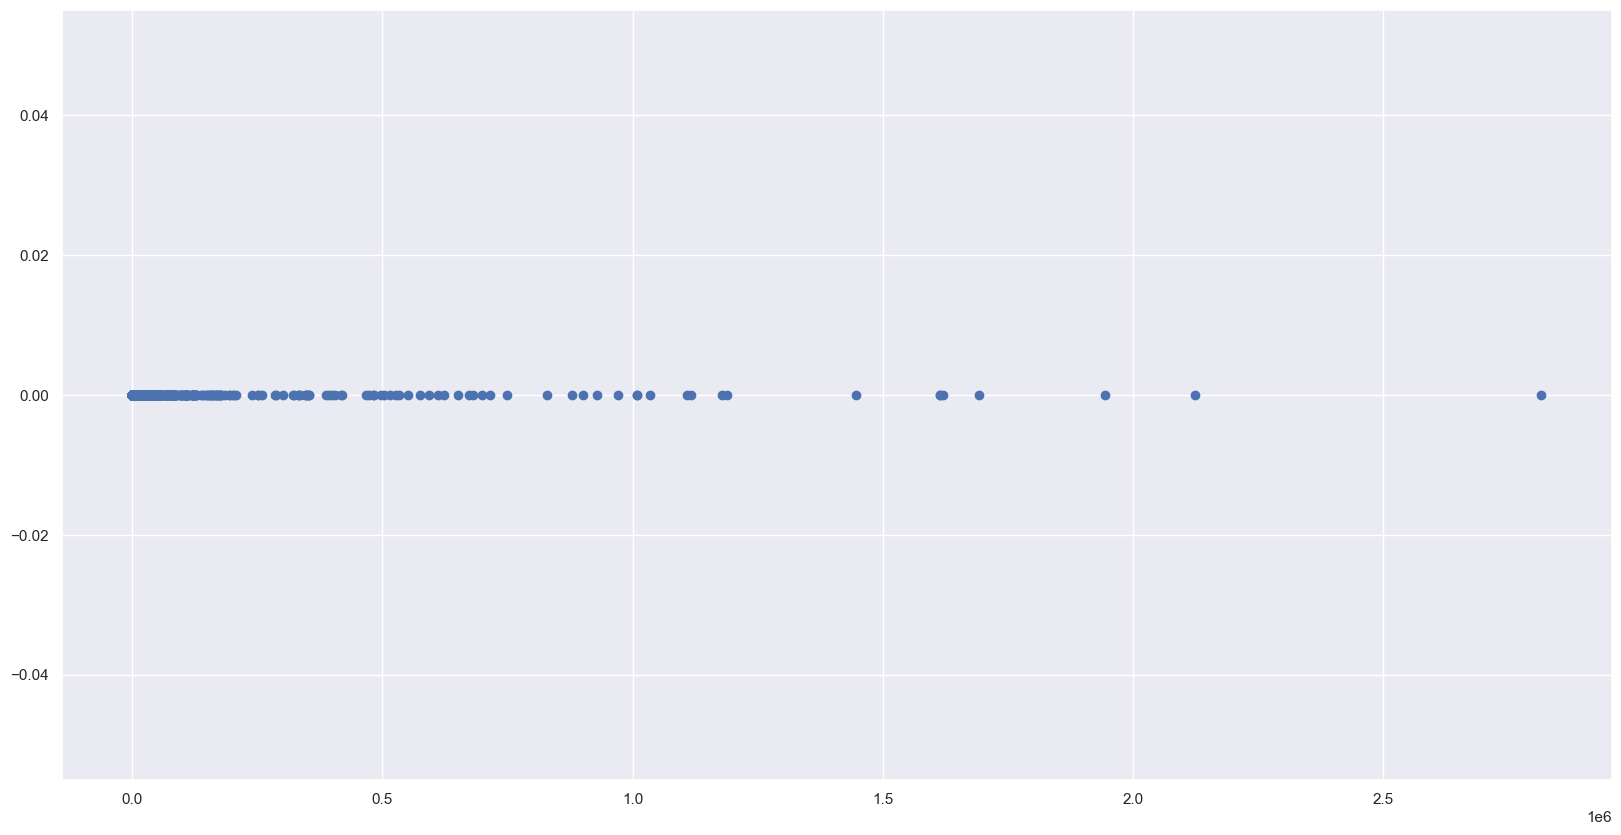

In [38]:
inform = train_data_df["MTO_PIA"]
plt.scatter(inform, np.zeros_like(inform), marker='o')
plt.show()

¿Que variables influencian el monto de gasto?

In [77]:
results_df = train_data_df.groupby('ESPECIFICA_DET', as_index=False)['MTO_PIA'].mean()
results_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

,ESPECIFICA_DET,MTO_PIA
70,99.OTROS PRODUCTOS SIMILARES,164.000000
35,2.MEDICAMENTOS,417.466667
34,2.GASTOS NOTARIALES,602.700000
26,"1.VESTUARIO, ACCESORIOS Y PRENDAS DIVERSAS",675.470588
72,99.OTROS SERVICIOS FINANCIEROS,771.000000
28,10.SUBVENCION ADICIONAL DE PRACTICAS PROFESIONALES,844.500000
62,8.CONTRIBUCIONES A LOS SEGUROS DE SALUD,939.125000
48,"3.LIBROS, DIARIOS, REVISTAS Y OTROS BIENES IMPRESOS NO VINCULADOS A ENSEÑANZA",940.000000
69,99.OTROS GASTOS,1800.142857
0,1.ALIMENTOS Y BEBIDAS PARA CONSUMO HUMANO,1890.608696


In [78]:
results_2_df = train_data_df.groupby('ESPECIFICA', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\509975156.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,ESPECIFICA,MTO_PIA
19,13.SERVICIOS TÉCNICOS Y PROFESIONALES DESARROLLADOS POR PERSONAS JURÍDICAS,0.000000
31,3.ELABORACION DE EXPEDIENTES TECNICOS,0.000000
28,3.ADQUISICION DE EQUIPOS INFORMATICOS Y DE COMUNICACIONES,0.000000
23,2.ESTUDIO DE PREINVERSION,0.000000
20,14.SERVICIOS TÉCNICOS Y PROFESIONALES DESARROLLADOS POR PERSONAS NATURALES,0.000000
17,10.SERVICIO POR ATENCIONES Y CELEBRACIONES,0.000000
14,1.SUMINISTROS PARA MANTENIMIENTO Y REPARACION,0.000000
10,1.REPUESTOS Y ACCESORIOS,0.000000
40,9.ADQUISICION DE MAQUINARIA Y EQUIPO DIVERSOS,0.000000
8,1.PARA OFICINA,0.000000


In [76]:
results_2_df = train_data_df.groupby('SUBGENERICA_DET', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\617946289.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,SUBGENERICA_DET,MTO_PIA
2,1.OTROS GASTOS DE ACTIVOS NO FINANCIEROS,0.000000
3,1.PAGO DE SENTENCIAS JUDICIALES Y LAUDOS ARBITRALES,0.000000
5,11.SUMINISTROS PARA MANTENIMIENTO Y REPARACION,0.000000
6,"2.ADQUISICION DE MAQUINARIAS, EQUIPO Y MOBILIARIO",0.000000
10,3.AL GOBIERNO LOCAL,925.000000
21,8.SUMINISTROS MEDICOS,1447.130435
1,1.ALIMENTOS Y BEBIDAS,1890.608696
23,99.COMPRA DE OTROS BIENES,4629.976744
9,2.VESTUARIOS Y TEXTILES,8803.431034
19,7.SERVICIOS PROFESIONALES Y TECNICOS,9249.985075


In [52]:
results_2_df = train_data_df.groupby('GENERICA', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\3821057118.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,GENERICA,MTO_PIA
2,6.ADQUISICION DE ACTIVOS NO FINANCIEROS,0.000000
0,3.BIENES Y SERVICIOS,47975.672523
1,5.OTROS GASTOS,52274.304348


In [53]:
results_2_df = train_data_df.groupby('CATEGORIA_GASTO', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\2817067432.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,CATEGORIA_GASTO,MTO_PIA
1,6.GASTOS DE CAPITAL,32775.000000
0,5.GASTOS CORRIENTES,47823.383053


In [54]:
results_2_df = train_data_df.groupby('UBIGEO', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\4170283377.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,UBIGEO,MTO_PIA
48,210904,0.000000
45,210213,0.000000
44,210210,0.000000
42,210108,0.000000
31,160510,0.000000
33,160605,0.000000
13,100507,0.000000
23,140199,2634.346154
26,150303,2744.785714
38,180199,5743.464286


In [55]:
results_2_df = train_data_df.groupby('DISTRITO', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\688344037.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,DISTRITO,MTO_PIA
11,LAGUNAS,0.000000
4,CRUCERO,0.000000
25,SARAYACU,0.000000
8,HUATA,0.000000
9,JENARO HERRERA,0.000000
24,SAN JUAN DE SA,0.000000
26,TILALI,0.000000
23,SAMAN,0.000000
14,MARCABAL,0.000000
5,GORGOR,2744.785714


In [56]:
results_2_df = train_data_df.groupby('PROVINCIA', as_index=False)['MTO_PIA'].mean()
results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')

C:\Users\user\AppData\Local\Temp\ipykernel_10280\1513693323.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_2_df[results_df['MTO_PIA'] != 0].sort_values('MTO_PIA')


,PROVINCIA,MTO_PIA
34,REQUENA,0.000000
1,ALTO AMAZONAS,0.000000
26,MOHO,0.000000
3,AZANGARO,0.000000
6,CARABAYA,0.000000
35,SANCHEZ CARRIO,0.000000
8,CHICLAYO,2634.346154
5,CAJATAMBO,2744.785714
24,MARISCAL NIETO,5743.464286
38,TAMBOPATA,10431.255814


In [61]:
results_2_df = train_data_df.groupby('DEPARTAMENTO', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,DEPARTAMENTO,MTO_PIA
11,LAMBAYEQUE,2634.346154
15,MOQUEGUA,5743.464286
19,SAN MARTIN,6387.870370
14,MADRE DE DIOS,10431.255814
20,TACNA,11824.052632
21,UCAYALI,13382.236364
10,LA LIBERTAD,16354.676923
16,PASCO,18189.525424
17,PIURA,20433.919355
0,AMAZONAS,26752.233333


In [62]:
results_2_df = train_data_df.groupby('SEC_FUNC', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,SEC_FUNC,MTO_PIA
78,80,0.0
64,65,0.0
65,66,0.0
77,79,0.0
67,68,0.0
...,...,...
32,33,178000.0
34,35,180000.0
39,40,198872.2
63,64,267333.0


In [63]:
results_2_df = train_data_df.groupby('AVAN_FISICO_SEM', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,AVAN_FISICO_SEM,MTO_PIA
1,1,2781.250000
2,2,7917.534884
3,4,11008.867925
20,12429,19680.000000
0,0,24064.903766
5,9,27303.800000
6,10,28120.307692
7,12,32746.370370
8,16,39688.161290
4,6,41550.164228


In [64]:
results_2_df = train_data_df.groupby('CANT_META_SEM', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,CANT_META_SEM,MTO_PIA
1,1,2781.250000
2,2,7917.534884
3,4,11008.867925
21,11500,19680.000000
0,0,24064.903766
5,9,27303.800000
6,10,28120.307692
7,12,32746.370370
8,16,39688.161290
4,6,41550.164228


In [65]:
results_2_df = train_data_df.groupby('UNIDAD_MEDIDA', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,UNIDAD_MEDIDA,MTO_PIA
2,00054.EXPEDIENTE TECNICO,0.000000
7,00213.ESTUDIO DE PREINVERSION,0.000000
4,00086.PERSONA,12560.000000
0,00001.ACCION,15186.500000
8,00248.REPORTE,16846.273423
1,00043.ESTABLECIMIENTO,51255.248656
5,00096.PROYECTO,65550.000000
3,00060.INFORME,126549.092308
6,00152.USUARIO,133409.166667


In [68]:
results_2_df = train_data_df.groupby('FINALIDAD', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,FINALIDAD,MTO_PIA
31,"0417965.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO JENARO HERRERA, DISTRITO JENARO HERRERA - REQUENA - LORETO",0.000000
25,"0390719.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO QUINUAL, DISTRITO DE MARCABAL, SANCHEZ CARRION, LA LIBERTAD",0.000000
26,"0390720.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO DE TACNA, DISTRITO DE JOSE CRESPO Y CASTILLO, LEONCIO PRADO, HUANUCO",0.000000
27,"0395686.CREACION DEL CENTRO DE SERVICIOS -TAMBO EN EL CENTRO POBLADO DE SAMAN, DISTRITO DE SARAYACU, UCAYALI, LORETO",0.000000
17,"0367089.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO DE PUERTO AUXILIO, DISTRITO DE LAGUNAS, ALTO AMAZONAS, LORETO",0.000000
30,"0417291.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO LA MORADA, DISTRITO DE CHOLON - MARAÑON - HUANUCO",0.000000
14,"0332638.CREACION DEL CENTRO DE SERVICIOS TAMBO EN EL CENTRO POBLADO RUMITUNI, DISTRITO NAPO - MAYNAS - LORETO",0.000000
28,"0417289.CREACION DEL CENTRO DE SERVICIOS - TAMBO EN EL CENTRO POBLADO SACHAVACA, DISTRITO DE MONZON - HUMALIES - HUANUCO",0.000000
29,"0417290.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL CENTRO POBLADO CHEJACHE, DISTRITO DE SAMAN - AZANGARO - PUNO",0.000000
3,0025788.ELABORACION DE EXPEDIENTE TECNICO,0.000000


In [69]:
results_2_df = train_data_df.groupby('META', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,META,MTO_PIA
18,19,5163.333333
16,17,7736.410714
15,16,7766.320755
23,24,8794.000000
19,20,9765.716981
24,25,9912.656250
20,21,15899.072727
1,2,17658.500000
25,26,18110.062500
14,15,19391.500000


In [70]:
results_2_df = train_data_df.groupby('DIVISION_FN', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,DIVISION_FN,MTO_PIA
2,016.GESTION DE RIESGOS Y EMERGENCIAS,12560.000000
1,006.GESTION,31838.379585
3,051.ASISTENCIA SOCIAL,58656.398295
0,004.PLANEAMIENTO GUBERNAMENTAL,117211.272727


In [71]:
results_2_df = train_data_df.groupby('ACT_OBRA_ACCINV', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,ACT_OBRA_ACCINV,MTO_PIA
8,6000001.EXPEDIENTE TECNICO,0.000000
9,6000032.ESTUDIOS DE PRE - INVERSION,0.000000
7,5005582.IMPLEMENTACION DE MEDIDAS DE PROTECCION ANTE BAJAS TEMPERATURAS,12560.000000
2,5000003.GESTION ADMINISTRATIVA,28644.049320
6,5002358.GESTION DE LAS PRESTACIONES SOCIALES,58942.287327
3,5000004.ASESORAMIENTO TECNICO Y JURIDICO,62319.636364
5,5001253.TRANSFERENCIA DE RECURSOS PARA LA EJECUCION DE PROYECTOS DE INVERSION,65550.000000
4,5000005.GESTION DE RECURSOS HUMANOS,68120.611111
0,5000001.PLANEAMIENTO Y PRESUPUESTO,117211.272727
1,5000002.CONDUCCION Y ORIENTACION SUPERIOR,120827.600000


In [72]:
results_2_df = train_data_df.groupby('TIPO_ACT_OBRA_ACCINV', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,TIPO_ACT_OBRA_ACCINV,MTO_PIA
1,6.ACCION DE INVERSION,0.000000
0,5.ACTIVIDAD,47648.622085


In [73]:
results_2_df = train_data_df.groupby('PRODUCTO_PROYECTO', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,PRODUCTO_PROYECTO,MTO_PIA
0,2001621.ESTUDIOS DE PRE-INVERSION,0.000000
1,2157530.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. CENTRAL CCALLA SAN JUAN DE SALINAS-AZANGARO-PUNO,0.000000
2,2176877.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. CCANCCOLLY CRUCERO-CARABAYA-PUNO,0.000000
3,2176885.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL C.P. MARNO - LAMPA - LAMPA - PUNO,0.000000
4,"2176887.CREACION DEL CENTRO DE SERVICIOS DE APOYO AL HABITAT RURAL EN EL SECTOR AMSTA HUATASANI, TILALI, MOHO, PUNO",0.000000
5,2624607.CREACION DEL SERVICIO DEL ESTADO EN POBLACIONES RURALES CON LA PLATAFORMA DE SERVICIOS - TAMBO EN EL CENTRO POBLADO UROS TITINO DEL DISTRITO DE HUATA - PROVINCIA DE PUNO - DEPARTAMENTO DE PUNO,0.000000
6,3000739.POBLACION CON PRACTICAS SEGURAS PARA LA RESILIENCIA,12560.000000
7,3999999.SIN PRODUCTO,47769.367515


In [74]:
results_2_df = train_data_df.groupby('TIPO_PROD_PROY', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,TIPO_PROD_PROY,MTO_PIA
0,2.PROYECTO,0.000000
1,3.PRODUCTO,47648.622085


In [75]:
results_2_df = train_data_df.groupby('PROGRAMA_PPTAL', as_index=False)['MTO_PIA'].mean()
results_2_df.sort_values('MTO_PIA')

,PROGRAMA_PPTAL,MTO_PIA
0,0068.REDUCCION DE VULNERABILIDAD Y ATENCION DE EMERGENCIAS POR DESASTRES,12560.000000
1,9001.ACCIONES CENTRALES,33310.326019
2,9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESULTAN EN PRODUCTOS,58656.398295


Por lo que podemos concluir que las variables significativas son: "PROGRAMA_PPTAL", "PRODUCTO_PROYECTO", "ACT_OBRA_ACCINV", "DIVISION_FN", "FINALIDAD", "UNIDAD_MEDIDA", "CANT_META_SEM", "SEC_FUNC", "DEPARTAMENTO", "PROVINCIA", "DISTRITO", "UBIGEO", "CATEGORIA_GASTO", "GENERICA", "SUBGENERICA_DET", "SUBGENERICA_DET", "ESPECIFICA_DET", "ESPECIFICA".